In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_cluster = pd.read_csv('C:\\Users\\Pushkar\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [3]:
df_cluster.head()

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917


In [4]:
df_cluster.shape

(116, 8)

In [5]:
df_cluster.dtypes

year                   int64
SeaLevel             float64
Coal                 float64
Oil                  float64
Gas                  float64
CO2-Concentration    float64
TempGlobal           float64
TempLand             float64
dtype: object

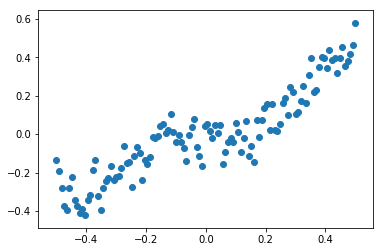

In [6]:
# normalizing in order to allow the K-Means algorithm to interpret it properly
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
Y = df_cluster[['year']]
X = df_cluster[['TempGlobal']]
X_norm = (X - X.mean()) / (X.max() - X.min())
Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())
pl.scatter(Y_norm,X_norm)
pl.show()
#  raw scatter plot of our data 
# objective of using K-Means is to separate these observations into different clusters

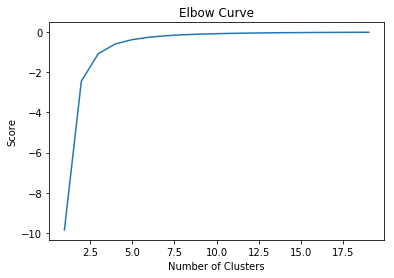

In [9]:
# generating an elbow curve in order to determine the number of clusters that we actually need for our k-means analysis
# ELBOW CURVE
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y_norm).score(Y_norm) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
# we see that our score (or the percentage of variance explained by our clusters) levels off at 3 clusters.
# so, we will choose 3 as the value k and i.e. number of clusters

In [7]:
# Principal Component Analysis and K-Means
# The pca algorithm is being used to convert data that might be overly dispersed into a set of linear combinations
# that can more easily be interpreted
pca = PCA(n_components=1).fit(Y_norm)
pca_d = pca.transform(Y_norm)
pca_c = pca.transform(X_norm)

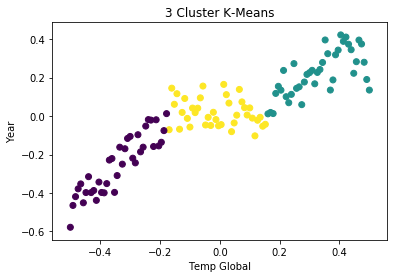

In [11]:
# we set n_clusters equal to 3, and upon generating the k-means output use the data originally transformed using pca in order
# to plot the clusters
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y_norm)
kmeansoutput
pl.figure('3 Cluster K-Means')
pl.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Temp Global')
pl.ylabel('Year')
pl.title('3 Cluster K-Means')
pl.show()
# k-means clusters, we see three distinct groups/clsuters

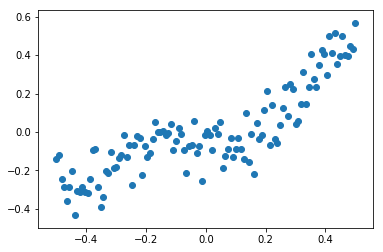

In [8]:
# Repeating the same process for TempLand
#clustering of TempLand and year
Y1 = df_cluster[['year']]
X1 = df_cluster[['TempLand']]
X1_norm = (X1 - X1.mean()) / (X1.max() - X1.min())
Y1_norm = (Y1 - Y1.mean()) / (Y1.max() - Y1.min())
pl.scatter(Y1_norm,X1_norm)
pl.show()

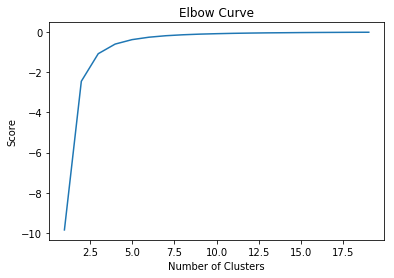

In [9]:
Nc1 = range(1, 20)
kmeans1 = [KMeans(n_clusters=i) for i in Nc1]
kmeans1
score1 = [kmeans1[i].fit(Y1_norm).score(Y1_norm) for i in range(len(kmeans1))]
score1
pl.plot(Nc1,score1)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [10]:
pca1 = PCA(n_components=1).fit(Y1_norm)
pca_d1 = pca1.transform(Y1_norm)
pca_c1 = pca1.transform(X1_norm)

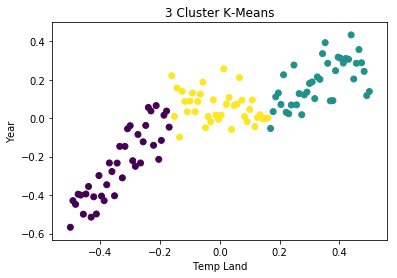

In [15]:
kmeans1=KMeans(n_clusters=3)
kmeansoutput1=kmeans1.fit(Y1_norm)
kmeansoutput1
pl.figure('3 Cluster K-Means')
pl.scatter(pca_d1[:, 0], pca_c1[:, 0], c=kmeansoutput1.labels_)
pl.xlabel('Temp Land')
pl.ylabel('Year')
pl.title('3 Cluster K-Means')
pl.show()

In [11]:
df_cluster.head()

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917


In [12]:
df_cluster_disct = df_cluster.copy(deep=True)

In [13]:
# now onwards will work on df_cluster_disct for discretization and then will try to do clustering
df_cluster_disct.head()

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917


In [33]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [31]:
df_cluster_disct.head(30)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.55570,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.55570,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.55570,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.55570,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.55570,63.88894,2202.66794,14.810417,8.090917,Low
5,1905,-133.7,5727.78236,180.55570,63.88894,2358.98058,14.954667,8.225167,Low
6,1906,-126.9,5727.78236,180.55570,63.88894,2470.98898,15.031917,8.379083,Low
7,1907,-128.3,5727.78236,180.55570,63.88894,2795.31422,14.874833,7.947167,Low
8,1908,-130.8,5727.78236,180.55570,63.88894,2685.51149,14.838167,8.186083,Low
9,1909,-126.3,5727.78236,180.55570,63.88894,2789.82023,14.790333,8.178250,Low


In [37]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [38]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct['TempLand_bins']=pd.cut(df_cluster_disct['TempLand'], 3,labels=["Low", "Medium", "High"])

In [40]:
df_cluster_disct.head(50)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins,TempLand_bins
0,1900,-130.1,5727.78236,180.55570,63.88894,1880.29881,15.143917,8.501583,Low,Low
1,1901,-130.5,5727.78236,180.55570,63.88894,1942.99709,15.073333,8.541917,Low,Low
2,1902,-125.9,5727.78236,180.55570,63.88894,1996.90205,14.958333,8.304417,Low,Low
3,1903,-117.9,5727.78236,180.55570,63.88894,2186.94199,14.836583,8.220167,Low,Low
4,1904,-128.2,5727.78236,180.55570,63.88894,2202.66794,14.810417,8.090917,Low,Low
5,1905,-133.7,5727.78236,180.55570,63.88894,2358.98058,14.954667,8.225167,Low,Low
6,1906,-126.9,5727.78236,180.55570,63.88894,2470.98898,15.031917,8.379083,Low,Low
7,1907,-128.3,5727.78236,180.55570,63.88894,2795.31422,14.874833,7.947167,Low,Low
8,1908,-130.8,5727.78236,180.55570,63.88894,2685.51149,14.838167,8.186083,Low,Low
9,1909,-126.3,5727.78236,180.55570,63.88894,2789.82023,14.790333,8.178250,Low,Low


In [41]:
#[(7.945, 8.575] = Low
# (8.575, 9.203] = Medium
# (9.203, 9.831]] = High

pd.cut(df_cluster_disct['TempLand'], 3).head()

0    (7.945, 8.575]
1    (7.945, 8.575]
2    (7.945, 8.575]
3    (7.945, 8.575]
4    (7.945, 8.575]
Name: TempLand, dtype: category
Categories (3, interval[float64]): [(7.945, 8.575] < (8.575, 9.203] < (9.203, 9.831]]

In [42]:
# df_cluster_disct is the discretized dataset in which TempGlobal_bins and TempLand_bins have 3 bins i.e. Low, Medium and High
df_cluster_disct.head(10)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins,TempLand_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low,Low
5,1905,-133.7,5727.78236,180.5557,63.88894,2358.98058,14.954667,8.225167,Low,Low
6,1906,-126.9,5727.78236,180.5557,63.88894,2470.98898,15.031917,8.379083,Low,Low
7,1907,-128.3,5727.78236,180.5557,63.88894,2795.31422,14.874833,7.947167,Low,Low
8,1908,-130.8,5727.78236,180.5557,63.88894,2685.51149,14.838167,8.186083,Low,Low
9,1909,-126.3,5727.78236,180.5557,63.88894,2789.82023,14.790333,8.178250,Low,Low


In [53]:
df_cluster_disct.dtypes

year                    int64
SeaLevel              float64
Coal                  float64
Oil                   float64
Gas                   float64
CO2-Concentration     float64
TempGlobal            float64
TempLand              float64
TempGlobal_bins      category
TempLand_bins        category
dtype: object

In [54]:
df_cluster_disct.set_index("year", inplace = True)

In [55]:
df_cluster_disct.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins,TempLand_bins
year,,,,,,,,,
1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low,Low
1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low,Low
1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low,Low
1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low,Low
1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low,Low


In [ ]:
# t-SNE Clustering:  t-distributed stochastic neighbor embedding
# maps high dimensional space into a 2 or 3 dimensional space which can be visualised
# models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are
# modeled by nearby points and dissimilar objects are modeled by distant points with high probability

In [57]:
from sklearn.manifold import TSNE

In [58]:
# Defining Model
model = TSNE(learning_rate=100)

In [59]:
df_cluster_data = df_cluster_disct[['SeaLevel', 'Coal', 'Oil', 'Gas', 'CO2-Concentration']]

In [63]:
df_cluster_data.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration
year,,,,,
1900,-130.1,5727.78236,180.5557,63.88894,1880.29881
1901,-130.5,5727.78236,180.5557,63.88894,1942.99709
1902,-125.9,5727.78236,180.5557,63.88894,1996.90205
1903,-117.9,5727.78236,180.5557,63.88894,2186.94199
1904,-128.2,5727.78236,180.5557,63.88894,2202.66794


In [64]:
df_cluster_data = df_cluster_data.values

In [99]:
df_cluster_data

array([[-1.30100000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  1.88029881e+03],
       [-1.30500000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  1.94299709e+03],
       [-1.25900000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  1.99690205e+03],
       [-1.17900000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  2.18694199e+03],
       [-1.28200000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  2.20266794e+03],
       [-1.33700000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  2.35898058e+03],
       [-1.26900000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  2.47098898e+03],
       [-1.28300000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  2.79531422e+03],
       [-1.30800000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01,  2.68551149e+03],
       [-1.26300000e+02,  5.72778236e+03,  1.80555700e+02,
         6.38889400e+01

In [68]:
# Fitting Model
transformed = model.fit_transform(df_cluster_data)

In [93]:
df_cluster_data_target = df_cluster_disct[['TempGlobal_bins']]

In [94]:
df_cluster_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [100]:
transformed

array([[-6.9547806 ,  4.0768223 ],
       [-6.9438677 ,  4.0831103 ],
       [-6.935341  ,  4.0915227 ],
       [-6.8888993 ,  4.1252246 ],
       [-6.8845677 ,  4.1289916 ],
       [-6.8108196 ,  4.3208137 ],
       [-6.7770557 ,  4.352817  ],
       [-6.702441  ,  4.3975024 ],
       [-6.728331  ,  4.374584  ],
       [-6.704186  ,  4.3970714 ],
       [-5.0275745 ,  3.7031431 ],
       [-5.022962  ,  3.6742609 ],
       [-5.1034403 ,  3.4231453 ],
       [-5.1054626 ,  3.188897  ],
       [-5.009637  ,  3.6258552 ],
       [-5.018248  ,  3.6412218 ],
       [-5.117729  ,  3.2514937 ],
       [-5.0984917 ,  3.1503775 ],
       [-5.097252  ,  3.1441317 ],
       [-5.0189395 ,  3.68051   ],
       [-3.9175613 ,  3.1111698 ],
       [-3.9159882 ,  3.434596  ],
       [-3.910992  ,  3.3500767 ],
       [-3.9718184 ,  2.8593116 ],
       [-3.9734914 ,  2.8552754 ],
       [-3.9829009 ,  2.8072402 ],
       [-3.9371138 ,  3.0084963 ],
       [-3.9895916 ,  2.5495594 ],
       [-3.9877577 ,

In [91]:
# converting from categorical to 0,1 and 2.
# Low: 0
# Medium: 1
# High: 2
cleanup_nums = {"TempGlobal_bins":     {"Low": 0, "Medium": 1, "High": 2}}

In [98]:
df_cluster_data_target.replace(cleanup_nums, inplace=True)


In [89]:
df_cluster_target = df_cluster_data_target['TempGlobal_bins'].values
df_cluster_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

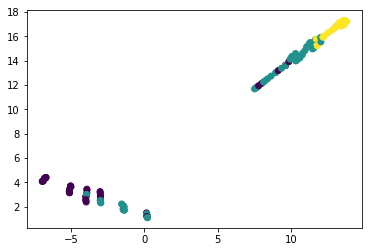

In [97]:
# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=df_cluster_target)
plt.show()

In [ ]:
# DBSCAN Clustering

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [212]:
# Declaring Model (Density-Based Spatial Clustering of Applications with Noise)
# doesn’t require that you input the number of clusters
# in exchange, have to tune two other parameters
#The scikit-learn implementation provides a default for the eps and min_samples parameters,
#but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points
#to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a 
#neighborhood to be considered a cluster
#dbscan = DBSCAN(eps=0.1, min_samples=2, algorithm='auto', metric='euclidean', leaf_size=30, p=2)
dbscan = DBSCAN(eps=50, min_samples=2, metric='euclidean', metric_params=None, algorithm='auto',
                leaf_size=30, p=12, n_jobs=-1)
# Fitting
dbscan.fit(df_cluster_data)



DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=-1, p=12)

In [213]:
# Transoring Using PCA
pca = PCA(n_components=2).fit(df_cluster_data)
pca_2d = pca.transform(df_cluster_data)

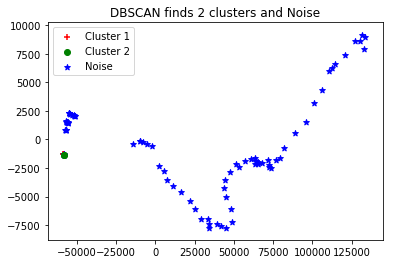

In [214]:
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

In [184]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)